# COMP2200 Data science group project - Group 50

#### Malaria and the Factors Affecting its Spread

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
malaria = pd.read_csv("files/malaria_data")
malaria.head()

,Country,Year,Cases,Deaths,CasesMedian,CasesMin,CasesMax,DeathsMedian,DeathsMin,DeathsMax,WHORegion
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,Eastern Mediterranean
1,Algeria,2017,0,0,0,NaN,NaN,0,NaN,NaN,Africa
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa
3,Argentina,2017,0,0,0,NaN,NaN,0,NaN,NaN,Americas
4,Armenia,2017,0,0,0,NaN,NaN,0,NaN,NaN,Europe


In [3]:
avg_temp = pd.read_csv("files/average_yearly_temperature.csv")
avg_temp.head()

,Unnamed: 0,Country name,Average yearly temperature (° C),Unnamed: 3
0,1,Aruba,25.35,NaN
1,2,Andorra,7.60,NaN
2,3,Afghanistan,12.60,NaN
3,4,Angola,21.55,NaN
4,5,Albania,11.40,NaN


In [4]:
Life_Expect = pd.read_excel("files/HDI.xlsx")
Life_Expect.head()

,Country Name,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,61.553,62.054,62.525,62.966,63.377,63.763,64.13
1,Albania,76.914,77.252,77.554,77.813,78.025,78.194,78.333
2,Algeria,75.199,75.436,75.661,75.878,76.090,76.298,76.499
3,Angola,56.33,57.236,58.054,58.776,59.398,59.925,60.379
4,Antigua and Barbuda,75.956,76.087,76.218,76.349,76.483,76.617,76.752


In [5]:
GDP = pd.read_csv("files/GDP Per Capita.csv")
GDP.head()

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,24985.013920,24712.493260,26441.619940,26893.011510,28396.908420,28452.170610,29350.805020,30253.279360,NaN,NaN
1,Africa Eastern and Southern,1686.695763,1672.363658,1653.188436,1658.650062,1507.800256,1404.953164,1540.232473,1534.171767,1485.307425,1330.140232
2,Afghanistan,591.162798,641.871438,637.165464,613.856505,578.466353,509.220101,519.888913,493.756581,507.103392,508.808409
3,Africa Western and Central,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332,1695.959215,1772.339155,1714.426800
4,Angola,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1895.770869


### Data cleaning

In [6]:
#Remove any NaN and infinite values from malaria table
malaria.replace([np.inf, -np.inf], np.nan, inplace=True)
malaria.dropna(inplace=True)
malaria.head()

,Country,Year,Cases,Deaths,CasesMedian,CasesMin,CasesMax,DeathsMedian,DeathsMin,DeathsMax,WHORegion
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,Eastern Mediterranean
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa
6,Bangladesh,2017,32924[30000-36000],76[3-130],32924,30000.0,36000.0,76,3.0,130.0,South-East Asia
8,Benin,2017,4111699[2774000-6552000],7328[5740-8920],4111699,2774000.0,6552000.0,7328,5740.0,8920.0,Africa
10,Bolivia (Plurinational State of),2017,6512[4900-8300],2[0-4],6512,4900.0,8300.0,2,0.0,4.0,Americas


In [7]:
#Remove unnecessary columns from average temperature table
avg_temp = avg_temp.drop(columns=['Unnamed: 0', 'Unnamed: 3'])
avg_temp.head()

,Country name,Average yearly temperature (° C)
0,Aruba,25.35
1,Andorra,7.60
2,Afghanistan,12.60
3,Angola,21.55
4,Albania,11.40


In [8]:
#Remove any NaN/infinite values
Life_Expect.drop(list(Life_Expect.filter(regex = 'Unnamed')), axis = 1, inplace = True)
Life_Expect.replace([np.inf, -np.inf], np.nan, inplace=True)
Life_Expect.dropna(inplace=True)
Life_Expect.head()

,Country Name,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,61.553,62.054,62.525,62.966,63.377,63.763,64.13
1,Albania,76.914,77.252,77.554,77.813,78.025,78.194,78.333
2,Algeria,75.199,75.436,75.661,75.878,76.090,76.298,76.499
3,Angola,56.33,57.236,58.054,58.776,59.398,59.925,60.379
4,Antigua and Barbuda,75.956,76.087,76.218,76.349,76.483,76.617,76.752


In [9]:
#Remove unnecessary columns (irrelevant years) and NaN/infinite values
GDP = GDP.drop(columns=['2018', '2019', '2020'])
GDP.replace([np.inf, -np.inf], np.nan, inplace=True)
GDP.dropna(inplace=True)
GDP.head()

,Country Name,2011,2012,2013,2014,2015,2016,2017
0,Aruba,24985.013920,24712.493260,26441.619940,26893.011510,28396.908420,28452.170610,29350.805020
1,Africa Eastern and Southern,1686.695763,1672.363658,1653.188436,1658.650062,1507.800256,1404.953164,1540.232473
2,Afghanistan,591.162798,641.871438,637.165464,613.856505,578.466353,509.220101,519.888913
3,Africa Western and Central,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332
4,Angola,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057


In [10]:
#Changing the names of countries in the GDP dataframe so as
#to be consistent with the malaria dataframe
GDP.at[44, 'Country Name'] = 'Congo'
GDP.at[67, 'Country Name'] = 'Egypt'
GDP.at[90, 'Country Name'] = 'Gambia'
GDP.at[112, 'Country Name'] = 'Iran (Islamic Republic of)'
GDP.at[122, 'Country Name'] = 'Kyrgyzstan'
GDP.at[126, 'Country Name'] = 'Republic of Korea'
GDP.at[129, 'Country Name'] = "Lao People's Democratic Republic"
GDP.at[193, 'Country Name'] = "Democratic People's Republic of Korea"
GDP.at[254, 'Country Name'] = "Venezuela (Bolivarian Republic of)"
GDP.at[257, 'Country Name'] = "Viet Nam"
GDP.at[262, 'Country Name'] = "Yemen"

#### Removing Outliers

#### Checking For outliers

[Text(0.5, 1.0, 'Median Number of Cases BoxPlot - Tens of Millions')]

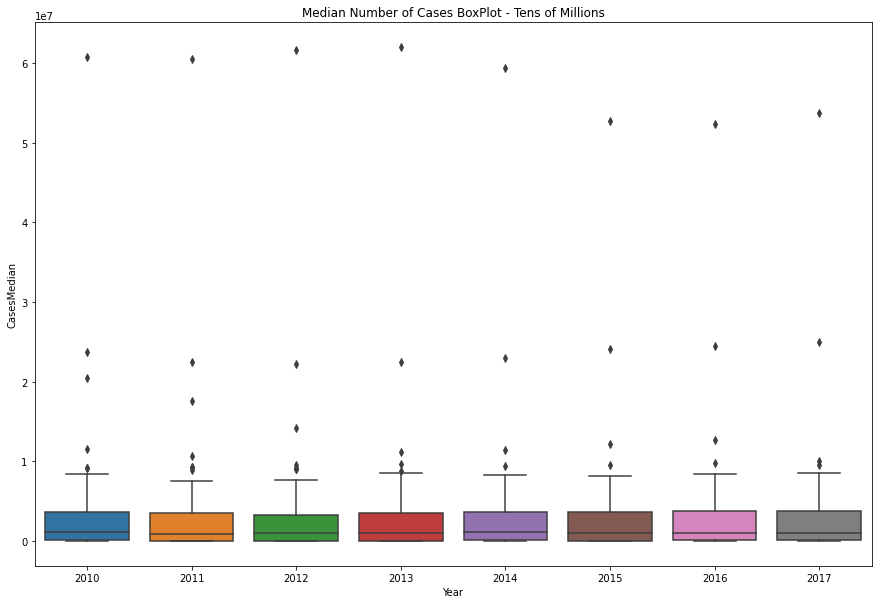

In [11]:
f, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(x = "Year", y = "CasesMedian", data = malaria).set(title = 'Median Number of Cases BoxPlot - Tens of Millions')

In [12]:
M2014 = malaria[malaria['Year'] == 2014]
columns = ['Country', 'CasesMedian', 'WHORegion']
print(M2014[columns][(M2014['CasesMedian'] > 10000000)])

                              Country  CasesMedian        WHORegion
348  Democratic Republic of the Congo     23031390           Africa
368                             India     11420000  South-East Asia
390                           Nigeria     59365039           Africa


[Text(0.5, 1.0, 'Median Number of Deaths BoxPlot')]

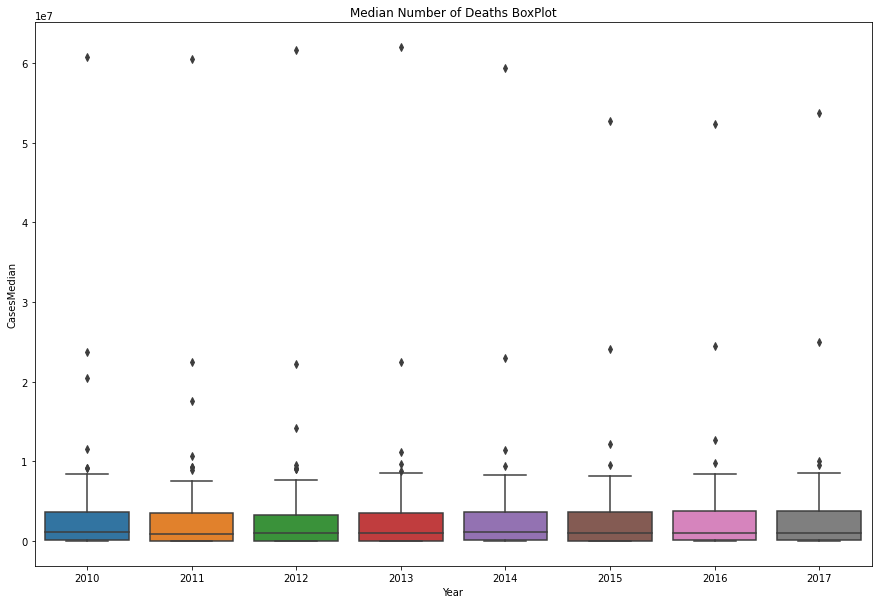

In [13]:
f, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(x = "Year", y = "CasesMedian", data = malaria).set(title = 'Median Number of Deaths BoxPlot')

#### Analysis of outliers

The box plots above highlight the spread of the median number of cases and median number of deaths per year in different countries respectively. This is to check for any outliers if there are any. The outliers from the different years are not genuine outliers which need to be removed as those are highlighting the cases within hotspots meaning that, that data is necessary for the analysis. This is further reinforced by the lack of volatility of the outliers from year to year. The same can be said for the box plots for the median number of deaths from year to year. The outliers highlight the deaths in the hotspots and there is no volatility from year to year hence there are no outliers to remove!

##### Combining Data

In [14]:
avg_temp = avg_temp.rename(columns = {'Country name' : 'Country'})
avg_temp

,Country,Average yearly temperature (° C)
0,Aruba,25.35
1,Andorra,7.60
2,Afghanistan,12.60
3,Angola,21.55
4,Albania,11.40
...,...,...
206,"Yemen, Rep.",23.85
207,South Africa,17.75
208,"Congo, Dem. Rep.",24.00
209,Zambia,21.40


In [15]:
Life_Expect = Life_Expect.rename(columns = {'Country Name' : 'Country'})
Life_Expect

,Country,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,61.553,62.054000,62.525,62.966000,63.377000,63.763000,64.13
1,Albania,76.914,77.252000,77.554,77.813000,78.025000,78.194000,78.333
2,Algeria,75.199,75.436000,75.661,75.878000,76.090000,76.298000,76.499
3,Angola,56.33,57.236000,58.054,58.776000,59.398000,59.925000,60.379
4,Antigua and Barbuda,75.956,76.087000,76.218,76.349000,76.483000,76.617000,76.752
...,...,...,...,...,...,...,...,...
196,Virgin Islands (U.S.),78.317073,78.517073,78.717073,78.868293,79.017073,79.168293,79.368293
197,West Bank and Gaza,72.915,73.041000,73.17,73.303000,73.442000,73.589000,73.74
198,"Yemen, Rep.",65.768,65.920000,66.016,66.066000,66.085000,66.087000,66.086
199,Zambia,57.126,58.502000,59.746,60.831000,61.737000,62.464000,63.043


In [16]:
#this code needs fixing

#Life_Expect_2011 = Life_Expect[["Country", "2011"]]
#Life_Expect_2012 = Life_Expect[["Country", "2012"]]
#Life_Expect_2013 = Life_Expect[["Country", "2013"]]
#Life_Expect_2014 = Life_Expect[["Country", "2014"]]
#Life_Expect_2015 = Life_Expect[["Country", "2015"]]
#Life_Expect_2016 = Life_Expect[["Country", "2016"]]
#Life_Expect_2017 = Life_Expect[["Country", "2017"]]

,Country,2011
0,Afghanistan,NaN
1,Albania,NaN
2,Algeria,NaN
3,Angola,NaN
4,Antigua and Barbuda,NaN
...,...,...
196,Virgin Islands (U.S.),NaN
197,West Bank and Gaza,NaN
198,"Yemen, Rep.",NaN
199,Zambia,NaN


In [17]:
GDP = GDP.rename(columns={'Country Name' : 'Country'})
GDP

,Country,2011,2012,2013,2014,2015,2016,2017
0,Aruba,24985.013920,24712.493260,26441.619940,26893.011510,28396.908420,28452.170610,29350.805020
1,Africa Eastern and Southern,1686.695763,1672.363658,1653.188436,1658.650062,1507.800256,1404.953164,1540.232473
2,Afghanistan,591.162798,641.871438,637.165464,613.856505,578.466353,509.220101,519.888913
3,Africa Western and Central,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332
4,Angola,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057
...,...,...,...,...,...,...,...,...
263,South Africa,8007.476439,7501.661096,6832.725546,6433.400402,5734.633422,5272.543648,6131.479450
264,Zambia,1672.907535,1763.069442,1878.346811,1762.427817,1338.290927,1280.806543,1535.196574
265,Zimbabwe,1093.653409,1304.968011,1429.998461,1434.896277,1445.069702,1464.588957,1335.665064
193,Democratic People's Republic of Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
GDP_2011 = GDP[["Country", "2011"]]
GDP_2012 = GDP[["Country", "2012"]]
GDP_2013 = GDP[["Country", "2013"]]
GDP_2014 = GDP[["Country", "2014"]]
GDP_2015 = GDP[["Country", "2015"]]
GDP_2016 = GDP[["Country", "2016"]]
GDP_2017 = GDP[["Country", "2017"]]

In [19]:
new_malaria = malaria.drop(columns=['Cases', 'Deaths', 'CasesMin', 'CasesMax', 'DeathsMin', 'DeathsMax'])

In [20]:
new_malaria.head()

,Country,Year,CasesMedian,DeathsMedian,WHORegion
0,Afghanistan,2017,630308,298,Eastern Mediterranean
2,Angola,2017,4615605,13316,Africa
6,Bangladesh,2017,32924,76,South-East Asia
8,Benin,2017,4111699,7328,Africa
10,Bolivia (Plurinational State of),2017,6512,2,Americas


In [21]:
M2010 = new_malaria[new_malaria["Year"] == 2010]
M2011 = new_malaria[new_malaria["Year"] == 2011]
M2012 = new_malaria[new_malaria["Year"] == 2012]
M2013 = new_malaria[new_malaria["Year"] == 2013]
M2014 = new_malaria[new_malaria["Year"] == 2014]
M2015 = new_malaria[new_malaria["Year"] == 2015]
M2016 = new_malaria[new_malaria["Year"] == 2016]
M2017 = new_malaria[new_malaria["Year"] == 2017]

In [22]:
new_malaria = M2010

In [23]:
new_malaria.head()

,Country,Year,CasesMedian,DeathsMedian,WHORegion
749,Afghanistan,2010,353343,200,Eastern Mediterranean
751,Angola,2010,3125901,13351,Africa
755,Bangladesh,2010,113895,274,South-East Asia
757,Benin,2010,3713395,8273,Africa
759,Bolivia (Plurinational State of),2010,19614,11,Americas


In [24]:
# M2010 = M2010.drop(columns=['Year', 'WHORegion'])
M2011 = M2011.drop(columns=['Year', 'WHORegion'])
M2012 = M2012.drop(columns=['Year', 'WHORegion'])
M2013 = M2013.drop(columns=['Year', 'WHORegion'])
M2014 = M2014.drop(columns=['Year', 'WHORegion'])
M2015 = M2015.drop(columns=['Year', 'WHORegion'])
M2016 = M2016.drop(columns=['Year', 'WHORegion'])
M2017 = M2017.drop(columns=['Year', 'WHORegion'])

In [25]:
new_malaria = new_malaria.drop(columns=['Year', 'CasesMedian', 'DeathsMedian'])

In [26]:
new_malaria = pd.merge(new_malaria, avg_temp, on='Country')
new_malaria = pd.merge(new_malaria, M2011, on='Country')
new_malaria = pd.merge(new_malaria, Life_Expect_2011, on='Country')
new_malaria = new_malaria.rename(columns = {'CasesMedian' : 'MedianCases_2011', 'DeathsMedian' : 'MedianDeaths_2011', '2011' : 'Life_Expectancy_2011'})
new_malaria = pd.merge(new_malaria, GDP_2011, on='Country')
new_malaria = new_malaria.rename(columns={'2011' : 'GDP_2011'})

In [27]:
new_malaria = pd.merge(new_malaria, M2012, on='Country')
new_malaria = pd.merge(new_malaria, Life_Expect_2012, on='Country')
new_malaria = new_malaria.rename(columns = {'CasesMedian' : 'MedianCases_2012', 'DeathsMedian' : 'MedianDeaths_2012', '2012' : 'Life_Expectancy_2012'})
new_malaria = pd.merge(new_malaria, GDP_2012, on='Country')
new_malaria = new_malaria.rename(columns={'2012' : 'GDP_2012'})

NameError: name 'Life_Expect_2012' is not defined

In [ ]:
new_malaria = pd.merge(new_malaria, M2013, on='Country')
new_malaria = pd.merge(new_malaria, Life_Expect_2013, on='Country')
new_malaria = new_malaria.rename(columns = {'CasesMedian' : 'MedianCases_2013', 'DeathsMedian' : 'MedianDeaths_2013', '2013' : 'Life_Expectancy_2013'})
new_malaria = pd.merge(new_malaria, GDP_2013, on='Country')
new_malaria = new_malaria.rename(columns={'2013' : 'GDP_2013'})

In [ ]:
new_malaria = pd.merge(new_malaria, M2014, on='Country')
new_malaria = pd.merge(new_malaria, Life_Expect_2014, on='Country')
new_malaria = new_malaria.rename(columns = {'CasesMedian' : 'MedianCases_2014', 'DeathsMedian' : 'MedianDeaths_2014', '2014' : 'Life_Expectancy_2014'})
new_malaria = pd.merge(new_malaria, GDP_2014, on='Country')
new_malaria = new_malaria.rename(columns={'2014' : 'GDP_2014'})

In [ ]:
new_malaria = pd.merge(new_malaria, M2015, on='Country')
new_malaria = pd.merge(new_malaria, Life_Expect_2015, on='Country')
new_malaria = new_malaria.rename(columns = {'CasesMedian' : 'MedianCases_2015', 'DeathsMedian' : 'MedianDeaths_2015', '2015' : 'Life_Expectancy_2015'})
new_malaria = pd.merge(new_malaria, GDP_2015, on='Country')
new_malaria = new_malaria.rename(columns={'2015' : 'GDP_2015'})

In [ ]:
new_malaria = pd.merge(new_malaria, M2016, on='Country')
new_malaria = pd.merge(new_malaria, Life_Expect_2016, on='Country')
new_malaria = new_malaria.rename(columns = {'CasesMedian' : 'MedianCases_2016', 'DeathsMedian' : 'MedianDeaths_2016', '2016' : 'Life_Expectancy_2016'})
new_malaria = pd.merge(new_malaria, GDP_2016, on='Country')
new_malaria = new_malaria.rename(columns={'2016' : 'GDP_2016'})

In [ ]:
new_malaria = pd.merge(new_malaria, M2017, on='Country')
new_malaria = pd.merge(new_malaria, Life_Expect_2017, on='Country')
new_malaria = new_malaria.rename(columns = {'CasesMedian' : 'MedianCases_2017', 'DeathsMedian' : 'MedianDeaths_2017', '2017' : 'Life_Expectancy_2017'})
new_malaria = pd.merge(new_malaria, GDP_2017, on='Country')
new_malaria = new_malaria.rename(columns={'2017' : 'GDP_2017'})

In [ ]:
new_malaria

#### One-hot encoding

In [36]:
malaria['WHORegion'].unique()

array(['Eastern Mediterranean', 'Africa', 'Americas', 'Europe',
       'South-East Asia', 'Western Pacific'], dtype=object)

In [37]:
malaria['WHORegion'] = malaria['WHORegion'].astype('category')
malaria['WHORegion_cat'] = malaria['WHORegion'].cat.codes
malaria.head()

,Country,Year,Cases,Deaths,CasesMedian,CasesMin,CasesMax,DeathsMedian,DeathsMin,DeathsMax,WHORegion,WHORegion_cat
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,Eastern Mediterranean,2
1,Algeria,2017,0,0,0,NaN,NaN,0,NaN,NaN,Africa,0
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa,0
3,Argentina,2017,0,0,0,NaN,NaN,0,NaN,NaN,Americas,1
4,Armenia,2017,0,0,0,NaN,NaN,0,NaN,NaN,Europe,3


# Recursive Feature Elimination (RFE)

Removing unnecessary features to make a more accurate heatmap

In [38]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [39]:
X_train, X_test, y_train, y_test = train_test_split(malaria[['WHORegion_cat']], malaria.CasesMax, train_size = 0.9)

# Data Visualisation

In [43]:
malaria_africa = malaria[(malaria.WHORegion == "Africa")]
malaria_africa.head()

,Country,Year,Cases,Deaths,CasesMedian,CasesMin,CasesMax,DeathsMedian,DeathsMin,DeathsMax,WHORegion,WHORegion_cat
1,Algeria,2017,0,0,0,NaN,NaN,0,NaN,NaN,Africa,0
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa,0
8,Benin,2017,4111699[2774000-6552000],7328[5740-8920],4111699,2774000.0,6552000.0,7328,5740.0,8920.0,Africa,0
11,Botswana,2017,2989[2300-4200],7[0-20],2989,2300.0,4200.0,7,0.0,20.0,Africa,0
13,Burkina Faso,2017,7907562[5645000-11330000],27791[25100-30500],7907562,5645000.0,11330000.0,27791,25100.0,30500.0,Africa,0


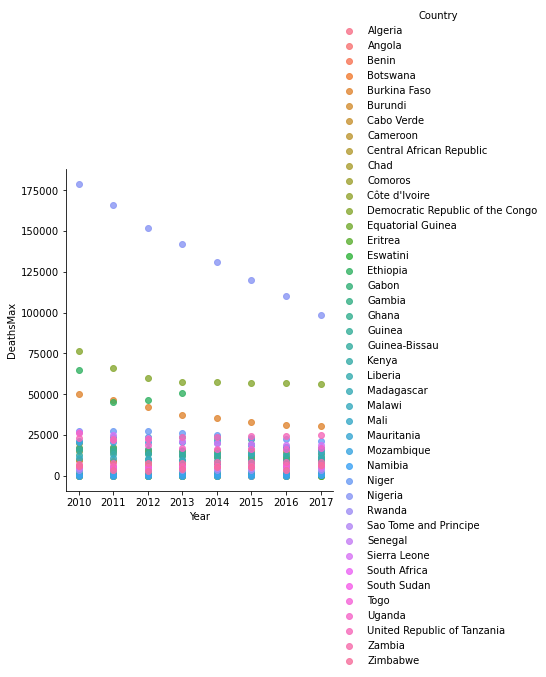

In [49]:
sns.lmplot(x = 'Year', y = 'DeathsMax', data = malaria_africa, fit_reg = False, hue = 'Country')

<AxesSubplot:>

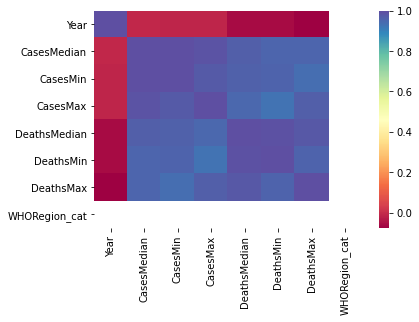

In [48]:
sns.heatmap(malaria_africa.corr(), cmap = "Spectral")

#### Heatmaps

In [29]:
malaria.groupby('WHORegion').CasesMax.value_counts()

WHORegion        CasesMax  
Africa           12230000.0    4
                 263000.0      2
                 642000.0      2
                 2834000.0     2
                 11000000.0    2
                              ..
Western Pacific  2063000.0     1
                 2154000.0     1
                 2546000.0     1
                 2815000.0     1
                 2926000.0     1
Name: CasesMax, Length: 479, dtype: int64

In [30]:
casesTable = (
malaria
 .groupby('WHORegion')
 .CasesMax.value_counts()
 .unstack()
 .fillna(0)
)

In [31]:
malaria.corr()

,Year,CasesMedian,CasesMin,CasesMax,DeathsMedian,DeathsMin,DeathsMax
Year,1.000000,-0.010009,-0.013099,-0.013015,-0.048129,-0.040775,-0.060133
CasesMedian,-0.010009,1.000000,0.996458,0.991130,0.967469,0.935876,0.957786
CasesMin,-0.013099,0.996458,1.000000,0.977674,0.965242,0.935296,0.945872
CasesMax,-0.013015,0.991130,0.977674,1.000000,0.957436,0.920103,0.969016
DeathsMedian,-0.048129,0.967469,0.965242,0.957436,1.000000,0.983527,0.977635
DeathsMin,-0.040775,0.935876,0.935296,0.920103,0.983527,1.000000,0.932202
DeathsMax,-0.060133,0.957786,0.945872,0.969016,0.977635,0.932202,1.000000


In [32]:
casesTable

CasesMax,430.0,460.0,620.0,660.0,730.0,840.0,850.0,940.0,970.0,1000.0,...,37700000.0,38570000.0,74040000.0,74500000.0,75930000.0,81580000.0,82700000.0,83240000.0,83800000.0,84840000.0
WHORegion,,,,,,,,,,,,,,,,,,,,,
Africa,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Americas,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eastern Mediterranean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
South-East Asia,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Western Pacific,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='CasesMax', ylabel='WHORegion'>

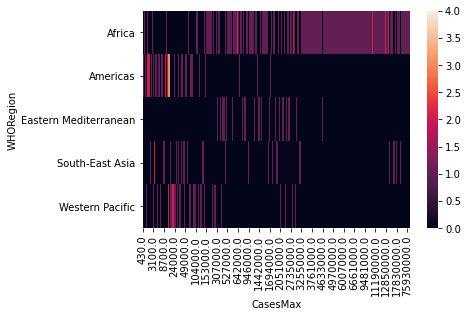

In [33]:
# plt.figure(figsize = (20,12))
sns.heatmap(casesTable)

Less significant features will need to be removed for a more accurate heatmap. This will be done by using RFE

Display infections in the region

E:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the 

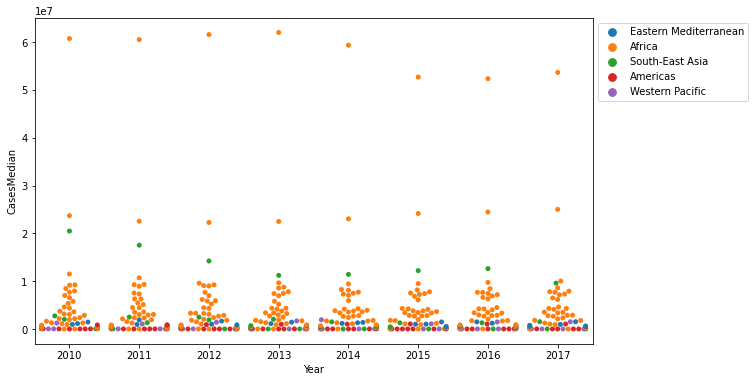

In [34]:
plt.figure(figsize = (10,6))
sns.swarmplot(x = 'Year', y = 'CasesMedian', data = malaria, hue = 'WHORegion')
plt.legend(bbox_to_anchor= (1, 1), loc = 2)

# Algorithms

Model the severity of different factors on the prevalence of the disease.

#### Covariance

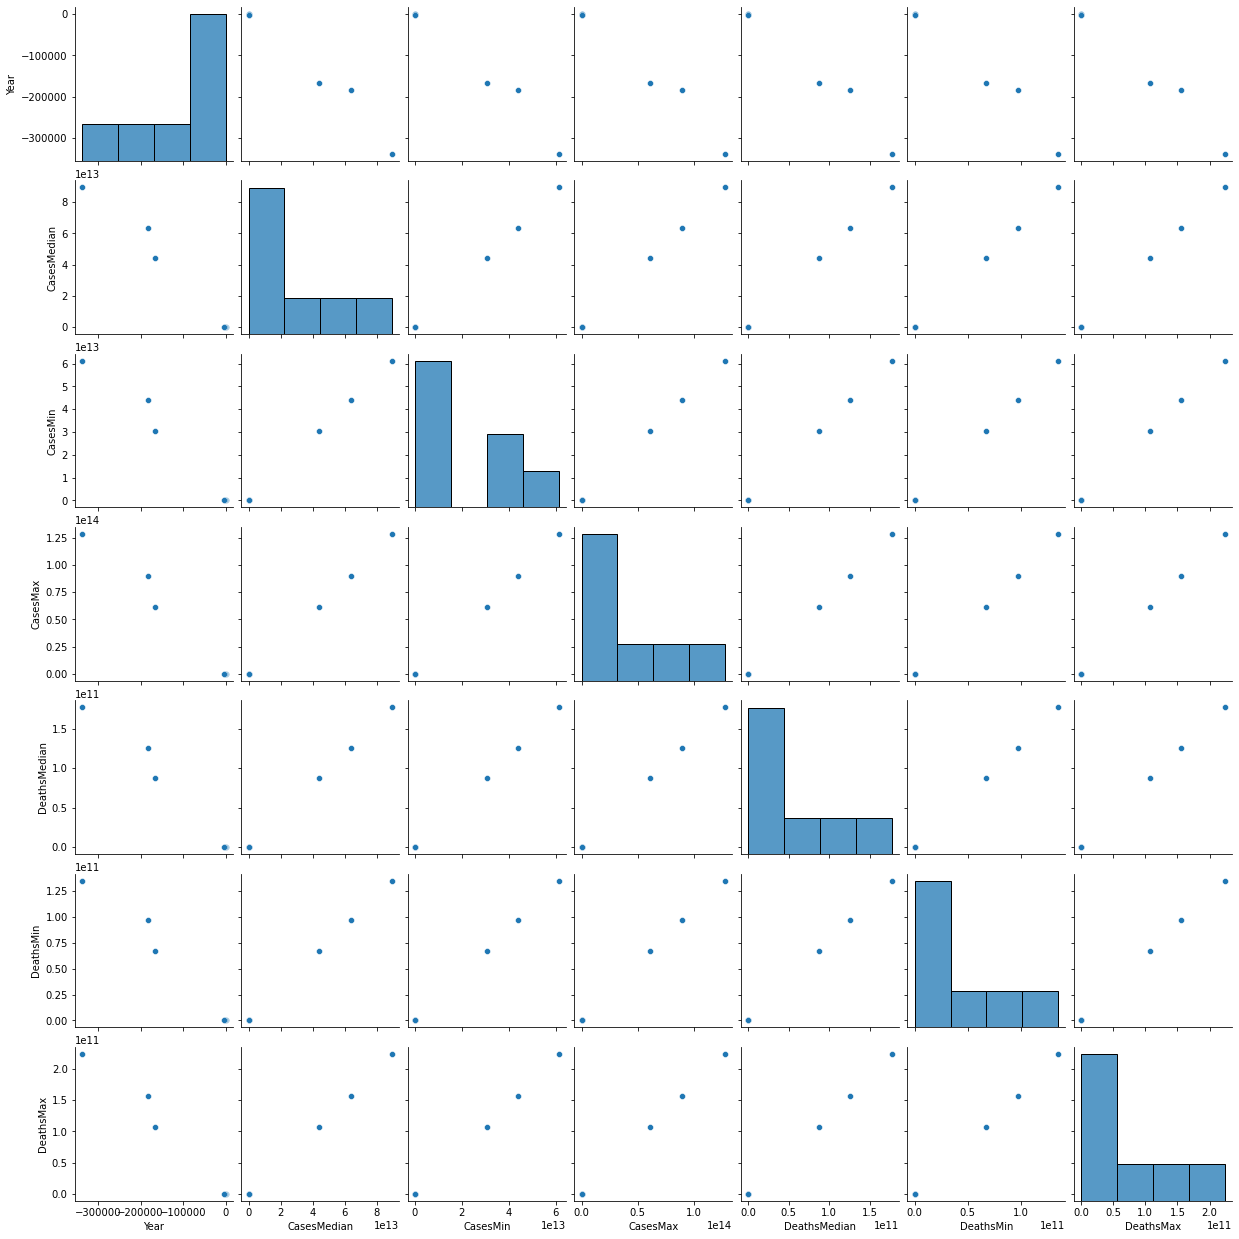

In [35]:
sns.pairplot(malaria.cov())

This matrix showcases the covariance of the malaria disease with the numbers of minimum, maximum and medians of deaths and in cases from 2013. 

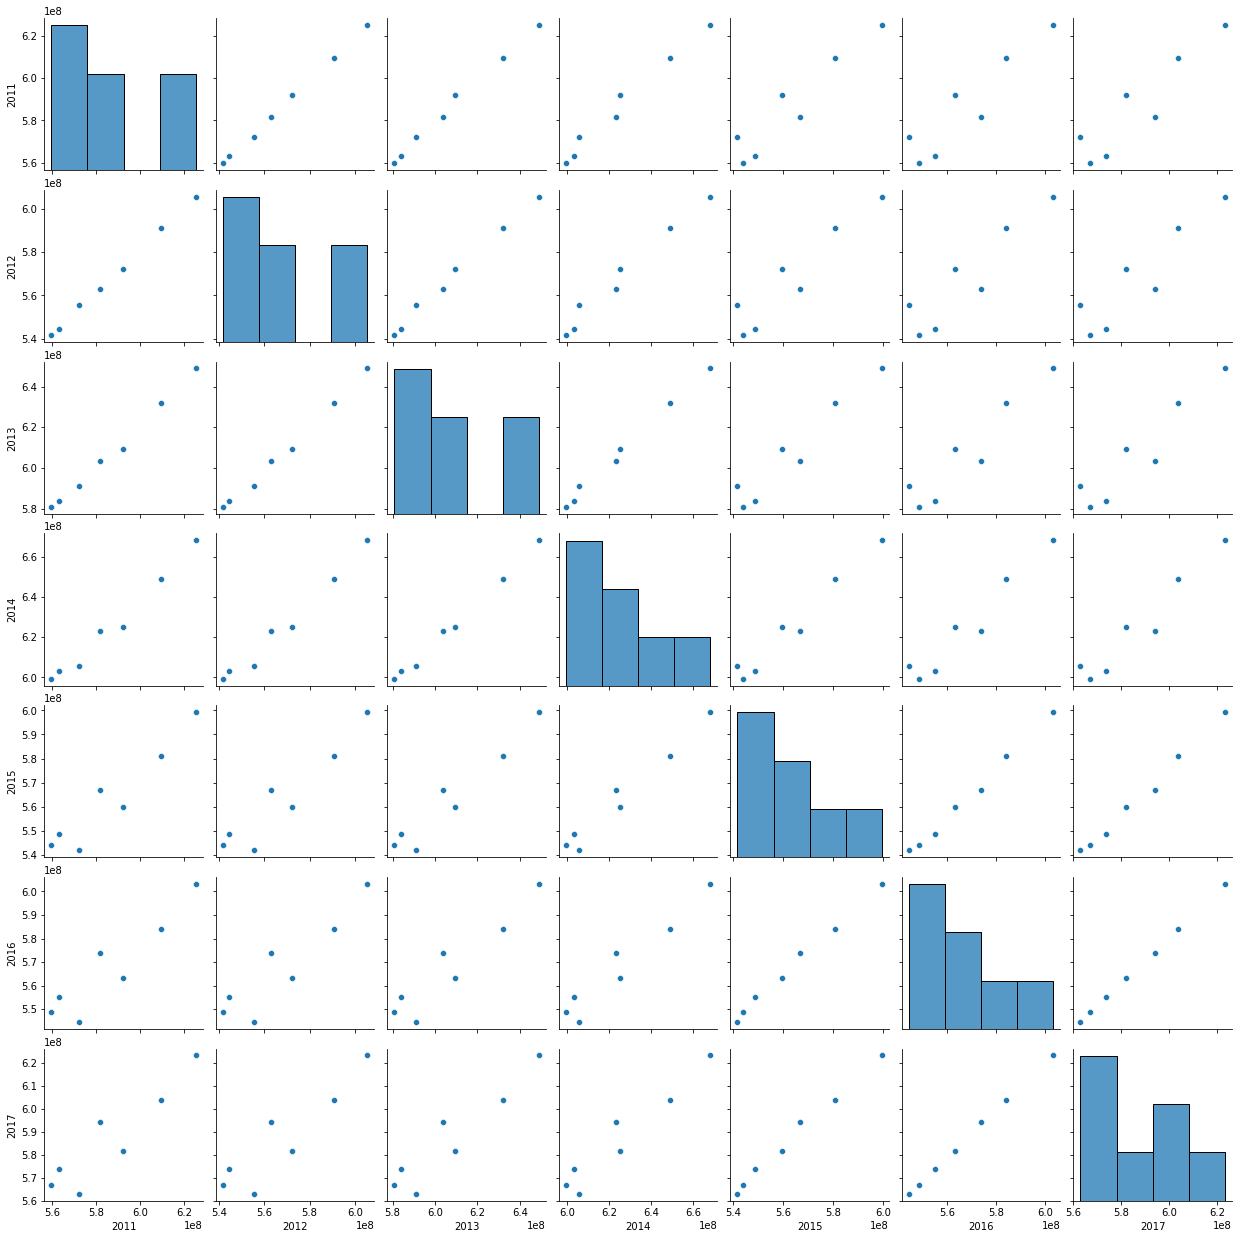

In [36]:
sns.pairplot(GDP.cov())

The graphs of GDP values highlights the covariance of wealth between countries on a yearly basis. These graphs show that the spread of wealth between these countries are ever so increasing year after year based upon a plethora of factors.

<AxesSubplot:>

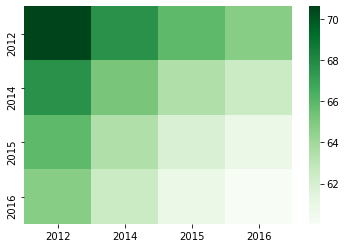

In [37]:
sns.heatmap(Life_Expect.cov(), cmap = "Greens")


The heatmap showcases that the covariance in life expectancy for an individual worlwide was at its peak in 2012 with an age of at least 70 years in 2012. Further, this map also indicates that the covariance in worlwide life expectancy diminishes year after year, reaching a low of 62 in developing nations.

<AxesSubplot:>

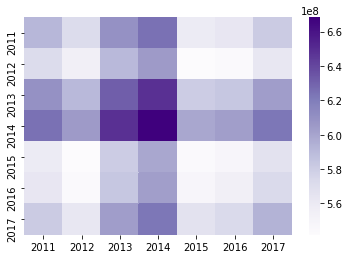

In [38]:
sns.heatmap(GDP.cov(), cmap = "Purples")


The heatmap determines that the highest worldwide covariance in GDP was during 2014 with the values stabilising from 2014 forward.

**Linear Regression**

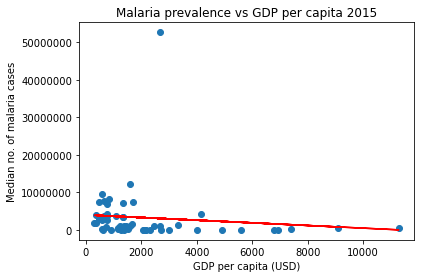

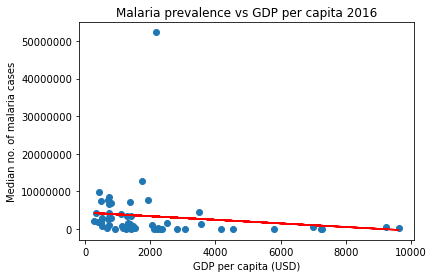

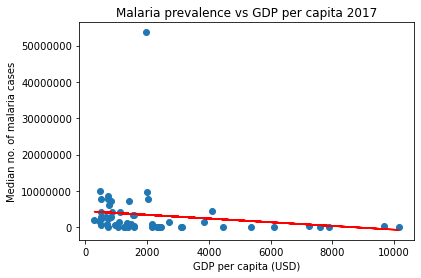

In [72]:
#Linear regression 2015
comparison_15 = pd.merge(M2015, GDP_2015, how='inner', left_on='Country', right_on='Country')
comparison_15.dropna(inplace=True)

X = comparison_15['2015'].values.reshape(-1, 1)
Y = comparison_15['CasesMedian'].values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.ticklabel_format(style = 'plain')

plt.scatter(X, Y)
plt.plot(X, Y_pred, color ='red')
plt.title('Malaria prevalence vs GDP per capita 2015')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Median no. of malaria cases')
plt.show()

#Linear regression 2016
comparison_16 = pd.merge(M2016, GDP_2016, how='inner', left_on='Country', right_on='Country')
comparison_16.dropna(inplace=True)

X = comparison_16['2016'].values.reshape(-1, 1)
Y = comparison_16['CasesMedian'].values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.ticklabel_format(style = 'plain')

plt.scatter(X, Y)
plt.plot(X, Y_pred, color ='red')
plt.title('Malaria prevalence vs GDP per capita 2016')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Median no. of malaria cases')
plt.show()

#Linear regression 2017
comparison_17 = pd.merge(M2017, GDP_2017, how='inner', left_on='Country', right_on='Country')
comparison_17.dropna(inplace=True)

X = comparison_17['2017'].values.reshape(-1, 1)
Y = comparison_17['CasesMedian'].values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.ticklabel_format(style = 'plain')

plt.scatter(X, Y)
plt.plot(X, Y_pred, color ='red')
plt.title('Malaria prevalence vs GDP per capita 2017')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Median no. of malaria cases')
plt.show()

This is a strong correlation between the spread of malaria in a country, and that country's GDP per capita. Although having a low GDP per capita does not necessarily mean that a country will have a high number of cases, it does mean there is a greater chance of malaria being present in the first place. Beyond 3000 GDP per capita, data points are much more sparse; there is a cluster around 1000 GDP per capita, demonstrating the impact that poverty has on a country's capacity to properly handle the spread of malaria.

For the sake of tidiness, and because their logistic regression models are effectively the same, the models for years 2011 through 2015 were not shown.

Malaria vs life expectancy

In [ ]:
#Linear regression life expectancy 2015


Malaria vs temperature

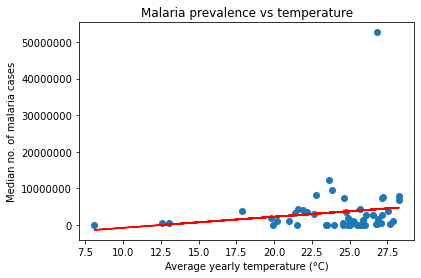

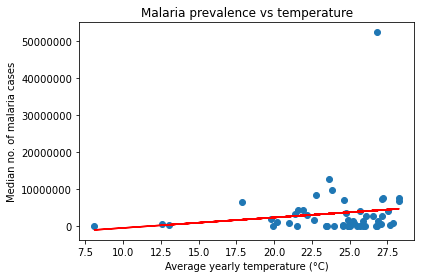

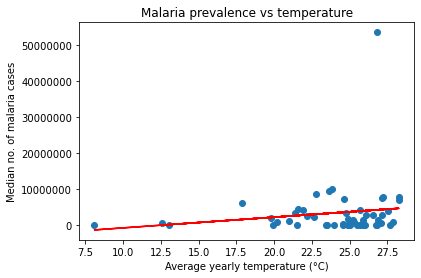

In [55]:
#Linear regression temperature 2015

temp_comparison_15 = pd.merge(M2015, avg_temp, how='inner', left_on='Country', right_on='Country')
temp_comparison_15.dropna(inplace=True)

X = temp_comparison_15['Average yearly temperature (° C)'].values.reshape(-1, 1)
Y = temp_comparison_15['CasesMedian'].values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.ticklabel_format(style = 'plain')

plt.scatter(X, Y)
plt.plot(X, Y_pred, color ='red')
plt.title('Malaria prevalence vs temperature')
plt.xlabel('Average yearly temperature (°C)')
plt.ylabel('Median no. of malaria cases')
plt.show()

#Linear regression temperature 2016

temp_comparison_16 = pd.merge(M2016, avg_temp, how='inner', left_on='Country', right_on='Country')
temp_comparison_16.dropna(inplace=True)

X = temp_comparison_16['Average yearly temperature (° C)'].values.reshape(-1, 1)
Y = temp_comparison_16['CasesMedian'].values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.ticklabel_format(style = 'plain')

plt.scatter(X, Y)
plt.plot(X, Y_pred, color ='red')
plt.title('Malaria prevalence vs temperature')
plt.xlabel('Average yearly temperature (°C)')
plt.ylabel('Median no. of malaria cases')
plt.show()

#Linear regression temperature 2017
temp_comparison_17 = pd.merge(M2017, avg_temp, how='inner', left_on='Country', right_on='Country')
temp_comparison_17.dropna(inplace=True)

X = temp_comparison_17['Average yearly temperature (° C)'].values.reshape(-1, 1)
Y = temp_comparison_17['CasesMedian'].values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.ticklabel_format(style = 'plain')

plt.scatter(X, Y)
plt.plot(X, Y_pred, color ='red')
plt.title('Malaria prevalence vs temperature')
plt.xlabel('Average yearly temperature (°C)')
plt.ylabel('Median no. of malaria cases')
plt.show()

The above graphs show that countries with higher temperatures are breeding grounds for malaria. Whilst temperature could not necessarily be used to predict the number of cases, it is a strong indicator of whether malaria will be present in a region. From approximately 20°C upwards, there are a significant number of data points (around 20), particularly around 25°C. In stark contrast, below 17.5°C, there are only 3 data points in total.
